In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt


%matplotlib inline



In [15]:
#pull the dataframes
%store -r train
%store -r test


**4) Feature engineering with high correlation features**

**a) Quantitative Feature Analysis**

In [16]:
train['totrms_abvgrd & gr_liv_area'] = train['totrms_abvgrd'] * train['gr_liv_area']

In [17]:
train['house_quality_over_years'] = train['year_built'] * train['overall_qual']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B1F9558888>,
      dtype=object)

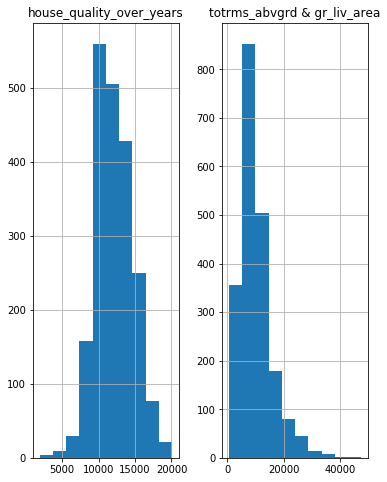

In [18]:
train.hist(column = ['house_quality_over_years',  'totrms_abvgrd & gr_liv_area'],
figsize = (6,8))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B1FDD98948>]],
      dtype=object)

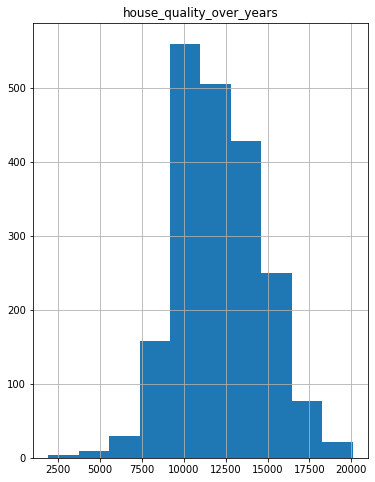

In [19]:
train.hist(column = ['house_quality_over_years'],
figsize = (6,8))

In [23]:
test['totrms_abvgrd & gr_liv_area'] = test['totrms_abvgrd'] * test['gr_liv_area']

In [24]:
test['house_quality_over_years'] = test['year_built'] * test['overall_qual']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B1FC688A48>,
      dtype=object)

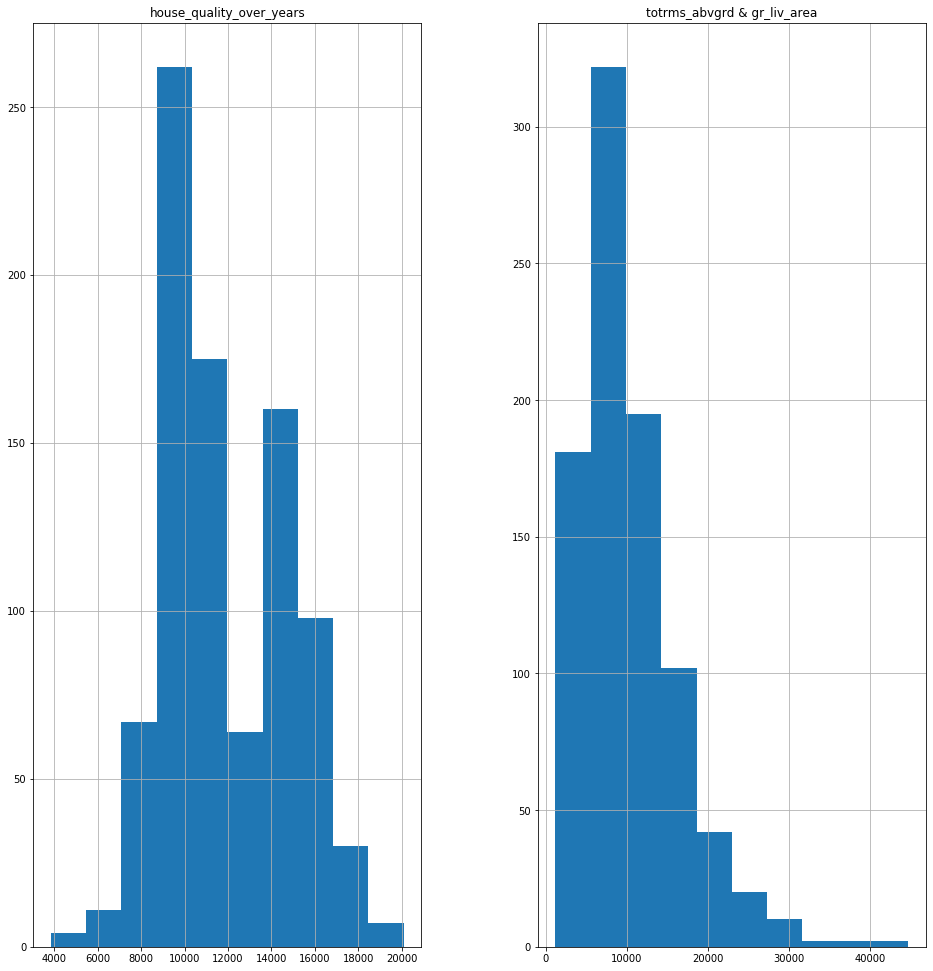

In [25]:
test.hist(column = ['house_quality_over_years',  'totrms_abvgrd & gr_liv_area' ],
figsize = (16,17))

**b) Qualitative feature Analysis**

In [26]:
ob = train.columns[train.dtypes == object]
ob

Index(['ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour',
       'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc',
       'central_air', 'electrical', 'kitchen_qual', 'functional',
       'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual',
       'garage_cond', 'paved_drive', 'pool_qc', 'fence', 'misc_feature',
       'sale_type'],
      dtype='object')

In [27]:
for i, v in enumerate(ob):
    print(v+'   ', train[v].unique())

ms_zoning    ['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']
street    ['Pave' 'Grvl']
alley    [nan 'Pave' 'Grvl']
lot_shape    ['IR1' 'Reg' 'IR2' 'IR3']
land_contour    ['Lvl' 'HLS' 'Bnk' 'Low']
utilities    ['AllPub' 'NoSeWa' 'NoSewr']
lot_config    ['CulDSac' 'Inside' 'Corner' 'FR2' 'FR3']
land_slope    ['Gtl' 'Sev' 'Mod']
neighborhood    ['Sawyer' 'SawyerW' 'NAmes' 'Timber' 'Edwards' 'OldTown' 'BrDale'
 'CollgCr' 'Somerst' 'Mitchel' 'StoneBr' 'NridgHt' 'Gilbert' 'Crawfor'
 'IDOTRR' 'NWAmes' 'Veenker' 'MeadowV' 'SWISU' 'NoRidge' 'ClearCr'
 'Blmngtn' 'BrkSide' 'NPkVill' 'Blueste' 'GrnHill' 'Greens' 'Landmrk']
condition_1    ['RRAe' 'Norm' 'PosA' 'Artery' 'Feedr' 'PosN' 'RRAn' 'RRNe' 'RRNn']
condition_2    ['Norm' 'RRNn' 'Feedr' 'Artery' 'PosA' 'PosN' 'RRAe' 'RRAn']
bldg_type    ['1Fam' 'TwnhsE' 'Twnhs' '2fmCon' 'Duplex']
house_style    ['2Story' '1Story' '1.5Fin' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin' '1.5Unf']
roof_style    ['Gable' 'Hip' 'Flat' 'Mansard' 'Shed' 'Gambrel']
roof_matl

**c) Boxplot Analysis**

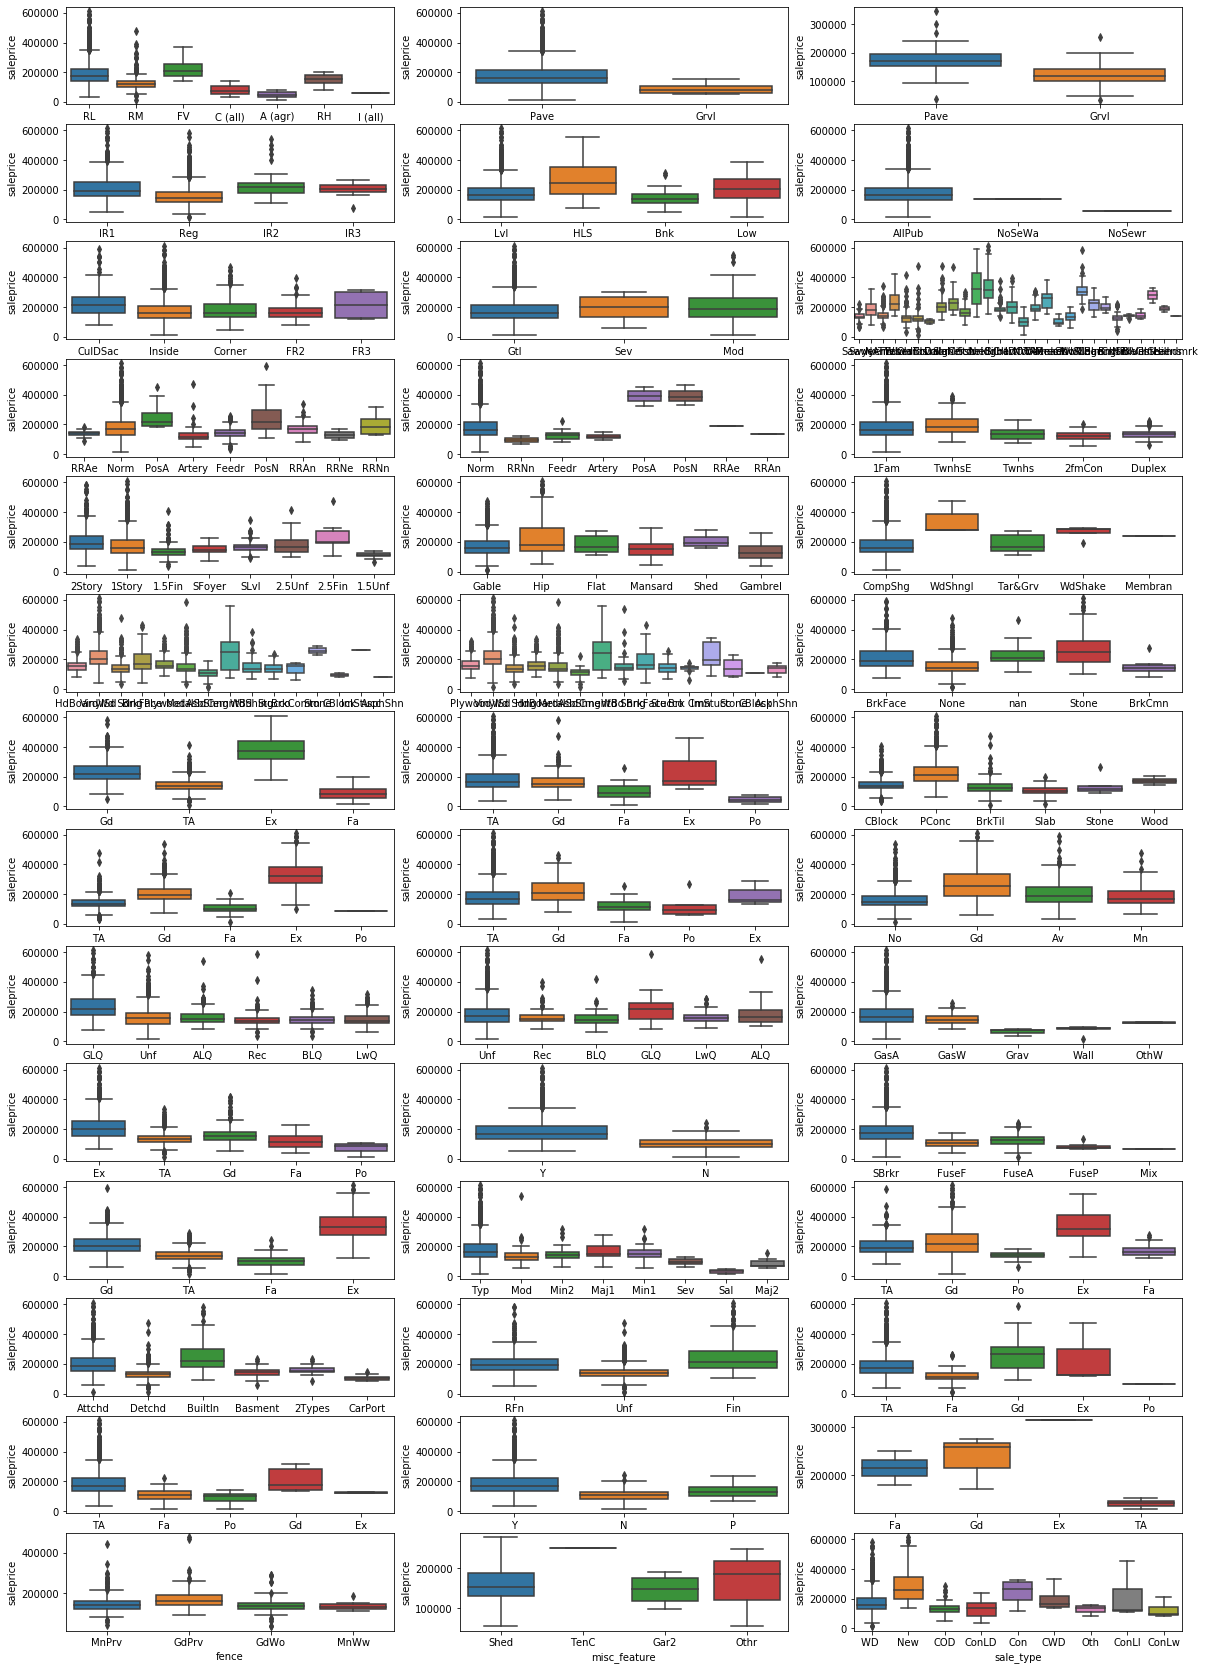

In [28]:
#higher mean and few outliers
plt.figure(figsize = (20,45))
for i in range(len(ob)):
    plt.subplot(len(ob)/2, 3, i + 1)
    sns.boxplot(x = ob[i], y = 'saleprice', data = train)

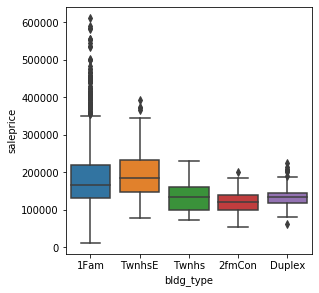

In [31]:
plt.figure(figsize = (15,10))
for i in range(len(cat)):
    plt.subplot(2, 3, i + 1)
    
    sns.boxplot(x = cat[i], y = 'saleprice', data = train)

In [32]:
train_new = pd.get_dummies(train, columns=['bldg_type', 'land_contour', 'street', 'central_air'])

In [33]:
test_new = pd.get_dummies(test, columns=['bldg_type', 'land_contour', 'street', 'central_air'])

In [34]:
train_new.shape

(2043, 90)

In [35]:
test_new.shape

(878, 89)

In [36]:
test_id = test_new[['id']].rename(columns={'id': 'Id'})

**d) Categorical columns Drop**

In [37]:
train_new.drop(columns = train_new.select_dtypes(include = 'object').columns, inplace =True)

In [38]:
#drop categorical values
test_new.drop(columns = test_new.select_dtypes(include = 'object').columns, inplace =True)

In [39]:
for i in test_new.columns:
    if i not in train_new.columns:
        print(i)

In [40]:
%store train_new

Stored 'train_new' (DataFrame)


In [41]:
%store test_new

Stored 'test_new' (DataFrame)


In [42]:
%store test_id

Stored 'test_id' (DataFrame)
